#1 Introducción
En este cuaderno se desarrollará el estudio de un modelo matemático que describe y estudia objetos y fenómenos frecuentes en la naturaleza que no se pueden explicar por las teorías clásicas y que se obtienen mediante simulaciones del proceso que los crea.

Un fractal es un objeto geométrico cuya estructura básica, fragmentada o aparentemente irregular, se repite a diferentes escalas.​ El término fue propuesto por el matemático Benoît Mandelbrot en 1975 y deriva del latín fractus, que significa quebrado o fracturado. Muchas estructuras naturales son de tipo fractal

---
#2 Armado de ambiente
Para el correcto funcionamiento es necesario instalar la libreria **pyopencl** y a su vez subir el codigo fuente " *fractal.c* "

In [1]:

! pip install pyopencl

     |████████████████████████████████| 747kB 8.6MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
  Created wheel for pytools: filename=pytools-2020.4.3-py2.py3-none-any.whl size=61374 sha256=52b7b39314b4c427b45b59e69c5c478d42e7904f4bef0d3d1713fd80a9c3d052
  Stored in directory: /root/.cache/pip/wheels/af/c7/81/a22edb90b0b09a880468b2253bb1df8e9f503337ee15432c64
Successfully built pytools


In [2]:
#@title # 2.2 Parámetros de ejecución subir archivo
#@markdown ---
#@markdown ### Especifique la URL del archivo:
url_archivo = "https://github.com/lucasarzola/EA2-SOA-GALAXIA/blob/master/HPC/Ejercicio3/fractal.c?raw=true" #@param {type:"string"}

#@markdown ---
# Leo la imagen desde internet.
#!wget https://github.com/wvaliente/SOA_HPC/blob/main/unlam.jpg?raw=true -O imagen.jpg

# TODO: Mejorar informaciòn y resutlado de ejecución. 
!wget {url_archivo} -O fractal.c

--2020-11-22 05:14:49--  https://github.com/lucasarzola/EA2-SOA-GALAXIA/blob/master/HPC/Ejercicio3/fractal.c?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/lucasarzola/EA2-SOA-GALAXIA/raw/master/HPC/Ejercicio3/fractal.c [following]
--2020-11-22 05:14:50--  https://github.com/lucasarzola/EA2-SOA-GALAXIA/raw/master/HPC/Ejercicio3/fractal.c
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/lucasarzola/EA2-SOA-GALAXIA/master/HPC/Ejercicio3/fractal.c [following]
--2020-11-22 05:14:50--  https://raw.githubusercontent.com/lucasarzola/EA2-SOA-GALAXIA/master/HPC/Ejercicio3/fractal.c
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw

---
#3 Desarrollo

1.0 121.0


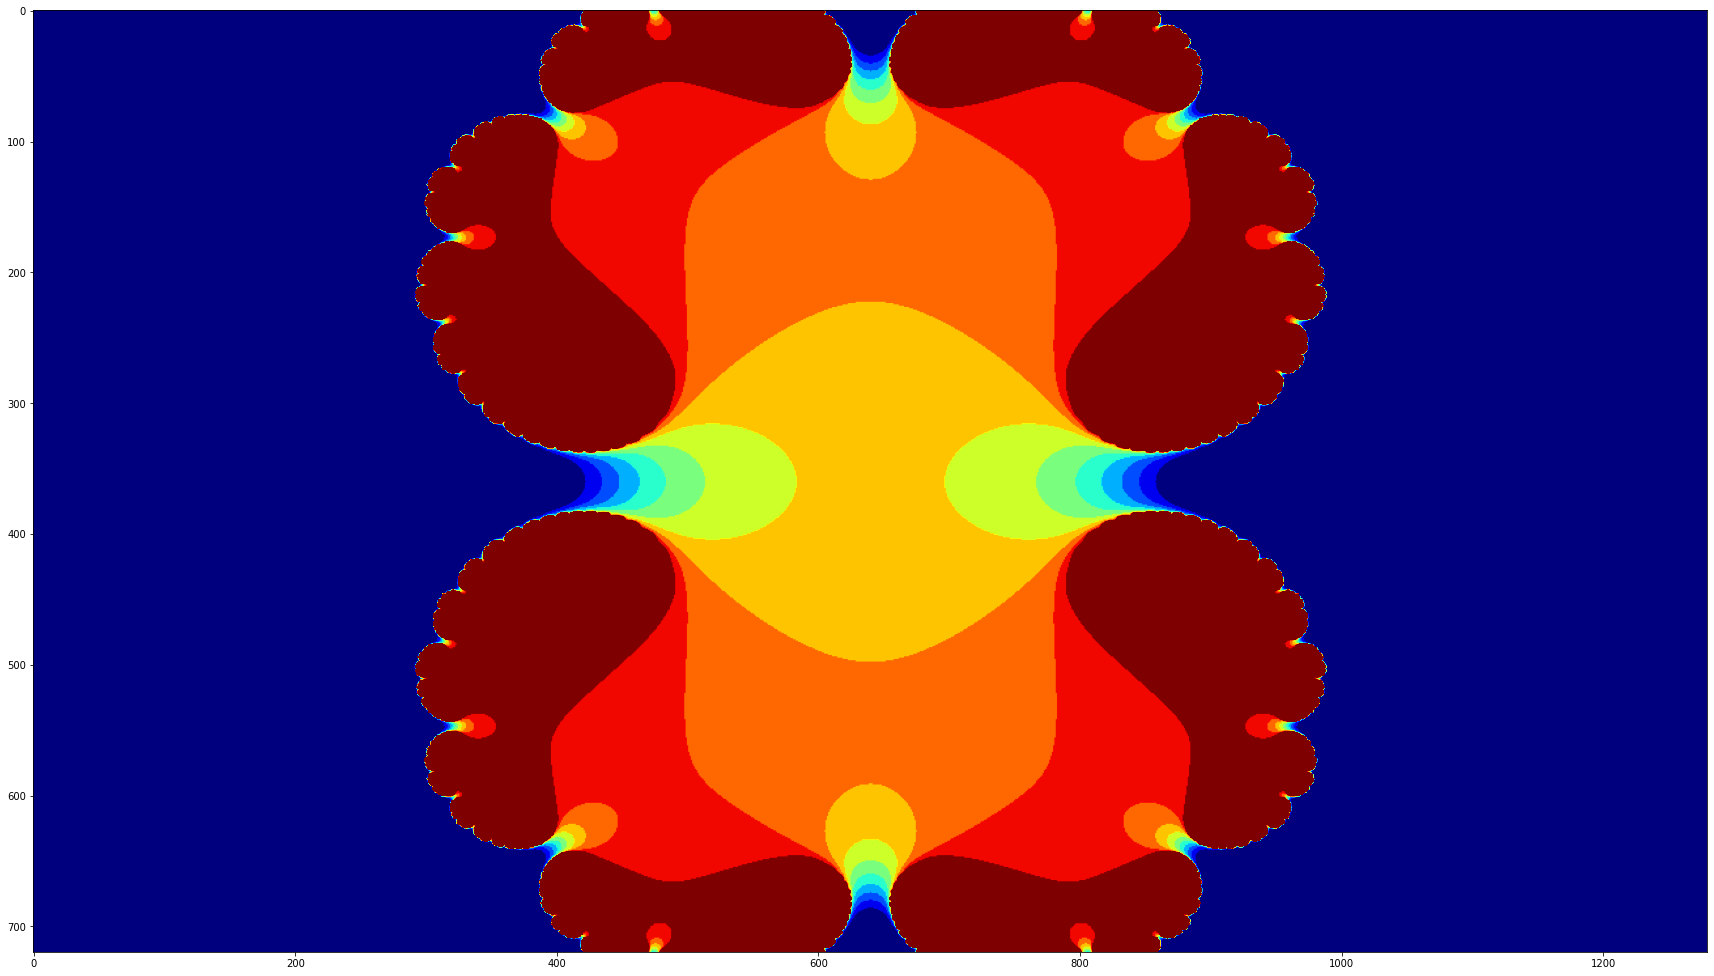

In [30]:
#@title 3.1 Parámetros de ejecución { vertical-output: true }

v_min =   10#@param {type: "number"}
v_max =   20#@param {type: "number"}

from __future__ import absolute_import, print_function
import matplotlib.pyplot as plt
import pyopencl as cl
import numpy as np

#Inicializar contexto y cola de ejecución

ID_P = 0
ID_D = 0
platforms = cl.get_platforms()
devices = [platforms[ID_P].get_devices()[ID_D]]
context = cl.Context(devices=devices,properties=[(cl.context_properties.PLATFORM, platforms[ID_P])])
context.get_info(cl.context_info.DEVICES)
queue = cl.CommandQueue(context, properties=cl.command_queue_properties.OUT_OF_ORDER_EXEC_MODE_ENABLE)
queue.get_info(cl.command_queue_info.CONTEXT)

#Código fuente y compilación del programa
try:
  source_file=open("fractal.c","r")
except IOError:
    print ("Error de entrada/salida." )
kernel = source_file.read()
source_file.close()

prg = cl.Program(context, kernel)
exe = prg.build(options=[])

host_output = np.zeros((720,1280),dtype=np.float32)
device_output = cl.Buffer(context, cl.mem_flags.READ_WRITE, size=host_output.nbytes)   

C = [0.279, 0]
event=exe.fractal(queue, host_output.shape, None, np.array(C,dtype=np.float32),np.array([40,70],dtype=np.float32),device_output)

cl.enqueue_copy(queue, host_output, device_output, is_blocking=True, wait_for=[event])

print(host_output.min(),host_output.max())
plt.figure(figsize=(30,30))
  plt.imshow(host_output,'jet',vmin=v_min,vmax=v_max)
  plt.show()


---
#4 Tabla 
 Procesador | Función | Detalle
------------|---------|----------
CPU      |  @param                | Lectura del tamaño de las matrices en Colab.
CPU      |  import                | Importa los módulos para funcionar.
CPU      |  queue.get_info(cl.cqi.CONTEXT) | Inicializar contexto y cola de ejecución.
**GPU**  |  cl.Program(context, kernel)     | Código fuente y compilación del programa
CPU      |  print()               | Informo los resultados.


---
#5 Conclusiones
Luego de una larga e intensiva investigación, se encontró el algoritmo que encajaba a la perfeccion a esta busqueda. un algoritmo que utiliza OpenCL que fue recomendado por la cátedra para implementar. El algoritmo 

#6 Bibliografía

[1] Fractal- wikipedia [Referencia](https://es.wikipedia.org/wiki/Fractal)

[2] Fractal en OpenCL -gchacaltana [Referencia](https://github.com/gchacaltana/PyOpenCL_Examples/blob/master/08_program_fractal.ipynb)